<a href="https://colab.research.google.com/github/sayan0506/Anomaly-Detection-Using-LSTM-Autoencoder/blob/main/Pima_Indian_Diabetes_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **What is Diabetes?**

* Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high. Blood glucose is your main source of energy and comes from the food you eat. Insulin, a hormone made by the pancreas, helps glucose from food get into your cells to be used for energy. Sometimes your body doesn’t make enough—or any—insulin or doesn’t use insulin well. Glucose then stays in your blood and doesn’t reach your cells.

* Over time, having too much glucose in your blood can cause health problems. Although diabetes has no cure, you can take steps to manage your diabetes and stay healthy.

* Sometimes people call diabetes “a touch of sugar” or “borderline diabetes.” These terms suggest that someone doesn’t really have diabetes or has a less serious case, but every case of diabetes is serious.

**What health problems can people with diabetes develop?**

Over time, high blood glucose leads to problems such as

* heart disease
* stroke
* kidney disease
* eye problems
* dental disease
* nerve damage
* foot problems

# Importing Libraries

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as mpl

# changing the matplotlib font colors to 'white'
COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

# Dataset 

* Pima indian diabetes dataset is available [here](https://github.com/sayan0506/COVID19-Medical-problem-based-modelling-project/blob/main/Dataset/diabetes.csv)

* This dataset contains data on female patients at least 21 years old of Pima Indian heritage.

[Dataset reference](https://data.world/uci/pima-indians-diabetes)


In [2]:
# Drive mount sand dataset fetching from the drive

# dataframe
df = pd.read_csv('/content/drive/MyDrive/Diabetes dataset/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Data Inspection
**Data Understanding**

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test [Refernce](https://www.mayoclinic.org/tests-procedures/glucose-tolerance-test/about/pac-20394296)
* BloodPressure: Diastolic blood pressure (mm Hg) [Refernce](https://www.webmd.com/hypertension-high-blood-pressure/qa/what-is-systolic-and-diastolic-blood-pressure)
* SkinThickness: Triceps skin fold thickness (mm) [Refernce](https://nutritionalassessment.mumc.nl/en/skinfold-measurements)
* Insulin: 2-Hour serum insulin (mu U/ml) [Refernce](https://medlineplus.gov/lab-tests/insulin-in-blood/)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function (Diabetes pedigree function a function which scores likelihood of diabetes based on family history)[Reference](https://machinelearningmastery.com/case-study-predicting-the-onset-of-diabetes-within-five-years-part-1-of-3/)
* Age: Age (years) 
* Outcome: Class variable (0 or 1)

**[Data undestanding reference](https://machinelearningmastery.com/case-study-predicting-the-onset-of-diabetes-within-five-years-part-1-of-3/)**

In [6]:
# statistical analysis
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


* From the above table, the min values of Glucose, BMI, BloodPressure, SkinThickness, Insulin ; such values cannot be expected to be 0.
* For example, having a blood pressure of 0 indicates that the person is dead.
* Therefore, it would be more correct to assign NaN instead of 0 values in the variables we choose 
* We need to explore the missing values in the features and do exffective, appropriate missing value treatment.
* This disguised missing data would mislead our later classification attempts, if we don't do missing value treatment.

**Dataset information**

In [20]:
def info(df):
  print(df.info())
  print(f'Input features: {df.columns[:-1]}')
  # df.isna() returns boolean for all values, whereas df.isna().values.any() return only missing values if any exist corresponding to the features
  print(f'Missing value check(NaN, Null): {df.isna().values.any(), df.isnull().values.any()}')

# info check
info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
Input features: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')
Missing value check(NaN, Null): (False, False)


**Kurtosis and Skewness check using histogram plot**

Histogram representation


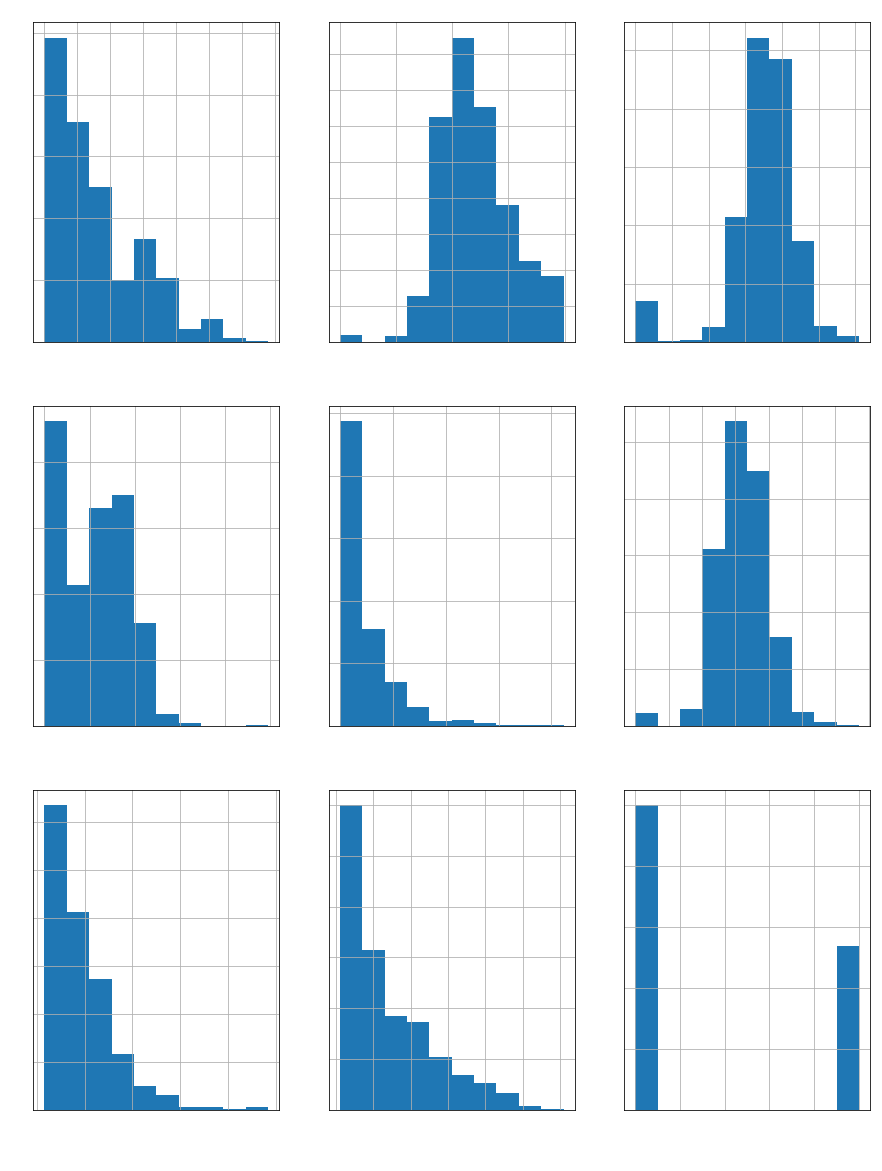

In [85]:
def hist_inspect(df):
  print('Histogram representation')
  fig = plt.figure(figsize=(15,20))
  r = len(df.columns)/3
  for i, col in enumerate(df.columns):
    fig.add_subplot(r,3,i+1)
    df[col].hist()
    plt.xlabel(f'Skew:  {df[col].skew()}\nKurtosis:  {df[col].kurtosis()}\n')
    plt.title(f'{df.columns[i]}')
  plt.show()

# histogram
hist_inspect(df)


**Here we don't need to really worry with the skewness and kurtosis corrction of the data, rather focus on other EDA, or later we can focus on these two moments correction.**

* [Reference](https://www.spcforexcel.com/knowledge/basic-statistics/are-skewness-and-kurtosis-useful-statistics)
* Further study: [TO DETERMINE SKEWNESS, MEAN AND DEVIATION WITH A NEW APPROACH ON CONTINUOUS DATA](https://www.researchgate.net/publication/314032599_TO_DETERMINE_SKEWNESS_MEAN_AND_DEVIATION_WITH_A_NEW_APPROACH_ON_CONTINUOUS_DATA)

**Variable type explore**



In [62]:
def var_explore(df):
  # for categorical generally 'object' type or 'O' used 
  cat_var = [col for col in df.columns if df[col].dtype == 'O' 
             and col!='Outcome']
  num_var = [col for col in df.columns if df[col].dtype != 'O' 
             and col!='Outcome']
  other_var = [col for col in df.columns if df[col].dtype != 'O'
             and col not in num_var
             and col!='Outcome']
  print(f'Categorical type variables: \n{cat_var}')
  print(f'Numerical type variables: \n{num_var}')
  print(f'Other type variables: \n{other_var}')

var_explore(df)

Categorical type variables: 
[]
Numerical type variables: 
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Other type variables: 
[]


**Explore Missing Values**

* From the **data understanding** section we found there are probable missing values(As 0 values are physically implausible) for **[Glucose, BloodPressure, SkinThickness, Insulin, BMI]**.

* Thus, we need to replace those 0 values to **Nan** or **Null** for further missing value analysis and treatment. 

In [70]:
# columns contain missing values
missing_val_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

df_mod = df.copy()
# replace 0 with Nan
for col in missing_val_columns:
  df_mod[col] = df[col].replace(0, np.NaN)

# df_mod is the copied version of df, else the change in df_copy would affect change in df

**Missing value analysis**

In [80]:
def missing_value_inspect(df):
  # obtaining the list of features where the missing value exists
  cols_with_missing = [col for col in df_mod.columns if df_mod[col].isnull().sum() > 0]
  
  #returns a series containing the list of missing columns along with misssing value count in descending order 
  miss_count = df[cols_with_missing].isnull().sum().sort_values(ascending = False)

  # percentage of missing data which also returns a series with percentage of missing data in descending order
  miss_percentage = (df[cols_with_missing].isnull().sum()/df.shape[0]*100).sort_values(ascending = False)
  
  # concatenation(axis = 1 for column wise concatenation or concatenate columns)
  missing_df = pd.concat([miss_count, miss_percentage], axis = 1, keys=['missing_count', 'missing_percentage'])

  print(f'Missing value inspection result \n{missing_df}')

# missing data explore
missing_value_inspect(df_mod)

Missing value inspection result 
               missing_count  missing_percentage
Insulin                  374           48.697917
SkinThickness            227           29.557292
BloodPressure             35            4.557292
BMI                       11            1.432292
Glucose                    5            0.651042


# Missing Value Treatment

**Reference**

* [Handling Missing Data for Advanced Machine Learning](https://medium.com/towards-artificial-intelligence/handling-missing-data-for-advanced-machine-learning-b6eb89050357)
* [7 Ways to Handle Missing Values in Machine Learning](https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e)
* [What are the Different Types of Missing Data?
](https://www.displayr.com/different-types-of-missing-data/)
* [Methods of Missing Value Treatment and their effect on the
Accuracy of Classification Models](https://www.researchgate.net/profile/Archish_Kapil/publication/328556287_Methods_of_Missing_Value_Treatment_and_their_effect_on_the_Accuracy_of_Classification_Models/links/5bd4438f92851c6b27922ca4/Methods-of-Missing-Value-Treatment-and-their-effect-on-the-Accuracy-of-Classification-Models.pdf)